In [117]:
# import library pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model as sk
import sklearn.tree



In [5]:
# Import testing data as test
test = pd.read_csv("C:/Users/singi/OneDrive/Praxis/Praxis/Data-Projects/Loan Predition/test.csv")
train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv")

In [8]:
# Print top 5 observation of train dataset
print (train.head() )

# Store total number of observation in training dataset
train_length = len (train)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [56]:
# Look at the summary of numerical variables for train data set
df= test.describe()
print (df)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  367.000000        367.000000   
mean       4805.599455        1569.577657  136.130790        336.953678   
std        4910.685399        2334.232099   60.946042         77.825365   
min           0.000000           0.000000   28.000000          1.000000   
25%        2864.000000           0.000000  101.000000        360.000000   
50%        3786.000000        1025.000000  126.000000        360.000000   
75%        5060.000000        2430.500000  157.500000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      367.000000  
mean         0.839237  
std          0.367814  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


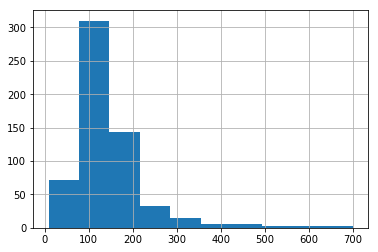

In [14]:
# Print the unique values and their frequency of variable Property_Area
df1=train.Property_Area.value_counts()
print (df1)

plt.show()
train.LoanAmount.hist()


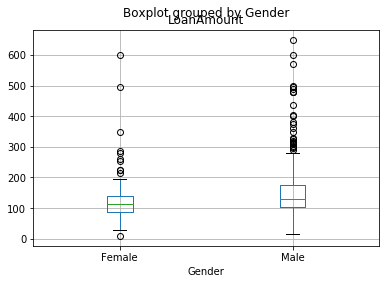

In [17]:
# Plot a box plot for variable LoanAmount by variable Gender of training data set
plt.show()
train.boxplot(column='LoanAmount', by = 'Gender')

In [20]:
# Approved Loan in absolute numbers
loan_approval = train['Loan_Status'].value_counts()['Y']
print (loan_approval)

422


In [22]:
# Two-way comparison: Credit History and Loan Status
twowaytable = pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True)
print (twowaytable)

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
All             179  385  564


In [25]:
# How many missing values in variable "Self_Employed" ?
n_missing_value_Self_Employed = train['Self_Employed'].isnull().sum()

In [27]:
# Variable Loan amount has missing values or not?
LoanAmount_have_missing_value = train['LoanAmount'].isnull().sum() > 0

In [124]:
# Check variables have missing values in test data set
number_missing_values_test_data = train.isnull().sum()
print(number_missing_values_test_data)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [123]:
# Impute missing value of LoanAmount with 168 for test data set
train['LoanAmount'].fillna(round(test['LoanAmount'].mean()), inplace=True)

# Impute missing value of LoanAmount with median for test data set
train['Gender'].fillna('Male',inplace=True)


train['Married'].fillna(1,inplace=True)

# Impute missing value of Credit_History
train['Credit_History'].fillna(1,inplace=True)

train['Dependents'].fillna(1,inplace=True)

train['Loan_Amount_Term'].fillna(1,inplace=True)

train['Self_Employed'].fillna('No',inplace=True)

In [126]:
# Training and Testing datasets are loaded in variable train and test dataframe respectively

# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Perform log transformation of TotalIncome to make it closer to normal
train['TotalIncome_log']= np.log(train['TotalIncome'])

# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Perform log transformation of TotalIncome to make it closer to normal
test['TotalIncome_log']= np.log(test['TotalIncome'])
print(train.head(10))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       136.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

In [133]:
number = LabelEncoder()

train['Loan_Status'] = number.fit_transform(train['Loan_Status'].astype(str))

train['Loan_Status'] = number.fit_transform(train['Loan_Status'].astype(str))

test['Education'] = number.fit_transform(test['Education'].astype(str))




In [134]:
#Building a model
train_modified = train.copy()
test_modified = test.copy()
# Select three predictors Credit_History, Education and Gender
predictors =['Credit_History','Education','Gender']

# Converting predictors and outcome to numpy array
x_train = train_modified[predictors].values
y_train = train_modified['Loan_Status'].values

# Model Building
model=sk.LogisticRegression()
model.fit(x_train, y_train)


# Select three predictors Credit_History, Education and Gender
predictors =['Credit_History','Education','Gender']

# Converting predictors and outcome to numpy array
x_test = test_modified[predictors].values

#Predict Output
predicted1= model.predict(x_test)
print (predicted1)
#Reverse encoding for predicted outcome
predicted1 = number.inverse_transform(predicted1)
print (predicted1)
#Store it to test dataset
test_modified['Loan_Status']=predicted1

print(test_modified.head(10))




[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
['1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '1' '1' '0' '1' '1' '1' '1'

In [135]:
test_modified.to_csv("Submission1.csv",columns=['Loan_ID','Loan_Status'])

PermissionError: [Errno 13] Permission denied: 'Submission1.csv'

In [158]:

#Tree method

# Select three predictors Credit_History, Education and Gender
predictors =['Credit_History','Education','Gender']

# Converting predictors and outcome to numpy array
x_train = train_modified[predictors].values
y_train = train_modified['Loan_Status'].values

# Model Building
model = sklearn.tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

# Converting predictors and outcome to numpy array
x_test = test_modified[predictors].values

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted
#data['sex'].replace(0, 'Female',inplace=True)
#data['sex'].replace([0,1],['Female','Male'],inplace=True)
test_modified['Loan_Status'].replace([0,1],['N','Y'],inplace=True)


#Output file to make submission
test_modified.to_csv("Submission2.csv",columns=['Loan_ID','Loan_Status'], index = False)



In [166]:
test_modified['Loan_Status'].astype(str)
test_modified['Loan_Status'].replace({0:'N',1:'Y'},inplace=True)

print (test_modified['Loan_Status'].head(10))

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: Loan_Status, dtype: object
